# BCPNN perfect 
This is a notebook to test the new class BCPNNperfect that I implemented to try yet another simplified version of the BCPNN and try to capture its effects.

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.0)

from network import Protocol, BCPNNModular, NetworkManager, BCPNNPefect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities

## General parameters

In [2]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
tau_z = 0.150
G = 1.0
tau_m = 0.020
sigma = 0.0
g_I = 10.0

## The example

In [3]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNPefect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  tau_z_pre=tau_z, G=G, tau_m=tau_m, g_I=g_I,
                  z_transfer=False, sigma=sigma, strict_maximum=False)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


success 100.0


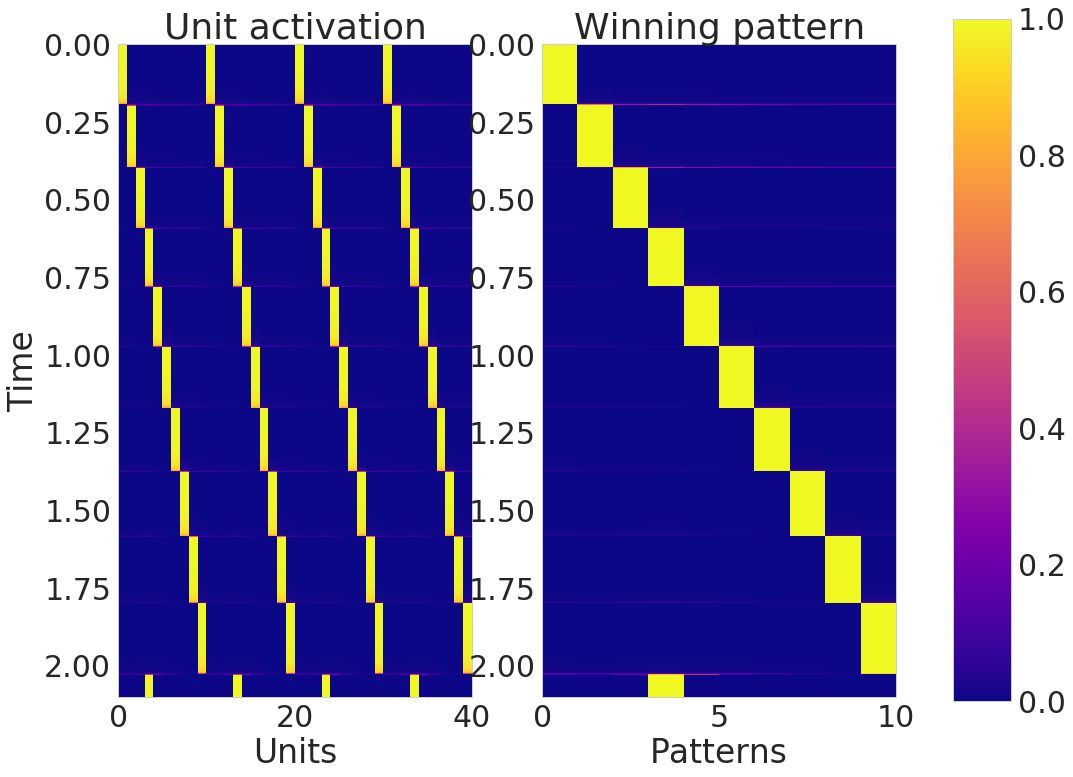

In [7]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

In [ ]:
o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, o[:, 0], label='0')
ax1.plot(time, o[:, 1], label='1')
ax1.plot(time, o[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, s[:, 0], label='0')
ax2.plot(time, s[:, 1], label='1')
ax2.plot(time, s[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

ax2.set_ylim([-240, -220])
ax2.legend();

In [ ]:
o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, a[:, 0], label='0')
ax1.plot(time, a[:, 1], label='1')
ax1.plot(time, a[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, i_ampa[:, 0], label='0')
ax2.plot(time, i_ampa[:, 1], label='1')
ax2.plot(time, i_ampa[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

# ax2.set_ylim([-240, -220])
ax2.legend();

## Even simpler

In [ ]:
# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNPefect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  tau_z_pre=tau_z, G=G, tau_m=tau_m, g_I=g_I, sigma=sigma,
                  z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=False)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)
print(nn.g_w_ampa)

In [ ]:
T_recall = 10.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
nn.g_w_ampa = 8.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

In [ ]:
o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, o[:, 0], label='0')
ax1.plot(time, o[:, 1], label='1')
ax1.plot(time, o[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, s[:, 0], label='0')
ax2.plot(time, s[:, 1], label='1')
ax2.plot(time, s[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

ax2.set_ylim([-240, -220])
ax2.legend();

In [ ]:
o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, a[:, 0], label='0')
ax1.plot(time, a[:, 1], label='1')
ax1.plot(time, a[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, i_ampa[:, 0], label='0')
ax2.plot(time, i_ampa[:, 1], label='1')
ax2.plot(time, i_ampa[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

# ax2.set_ylim([-240, -220])
ax2.legend();

In [ ]:
plot_weight_matrix(manager.nn, ampa=True)

In [ ]:
nn.get_parameters()

In [8]:
g_a_vector

NameError: name 'g_a_vector' is not defined